#### Read-in the data

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
def read_clean_data(filename):
    df = pd.read_csv(filename)[['title','artist','year','bpm', 'nrgy', 'dnce', 'dB','live', 'val', 'dur','acous', 'spch','pop']]
    df = df.rename({'bpm':'tempo','nrgy':'energy','dnce':'danceability','dB':'loudness','live':'liveness',
                  'val':'valence','dur':'duration','acous':'acousticness','spch':'speechiness','pop':'popularity'},
                 axis = 1)
    df['decade'] = filename[2:4] + 's'
    return df

In [55]:
from sklearn.preprocessing import StandardScaler

filenames = ['1950.csv','1980.csv','2010.csv']

df = pd.concat([read_clean_data(i) for i in filenames]).reset_index()
df_id = df[["title","artist","decade"]]
df = df.iloc[:,4:len(df.columns)-1]
group

mean        std   min     25%    50%     75%    max
tempo         118.201439  25.296846  62.0  100.00  117.0  135.00  195.0
energy         58.125899  22.835987   6.0   41.25   60.5   78.75   98.0
danceability   60.435252  14.348717  18.0   51.00   62.0   71.00   93.0
loudness       -8.460432   3.952363 -18.0  -11.00   -8.0   -5.00   -2.0
liveness       17.417266  13.359186   2.0    9.00   13.0   22.00   82.0
valence        55.636691  25.027949   9.0   34.00   55.0   77.75   99.0
duration      212.309353  56.488566  98.0  174.25  210.0  245.00  433.0
acousticness   33.744604  31.073156   0.0    7.00   20.5   61.00  100.0
speechiness     5.805755   5.445997   2.0    3.00    4.0    6.00   46.0
popularity     63.629496  16.622897  26.0   54.00   68.0   76.00   94.0

In [56]:
# standarizuojama
x = StandardScaler().fit_transform(df)

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

def do_mds(x,n_components=2,**kwargs): 
    mds = MDS(n_components,**kwargs)
    x_trans = mds.fit_transform(x)
    
    return x_trans


def do_pca(x,n_components=2,**kwargs): 
    pca = PCA(n_components,**kwargs)
    x_trans = pca.fit_transform(x)
    
    return x_trans

# klasterizavimas originaliems duomenims ir sumazinus dimensija
x_small = do_pca(x,n_components=2)

df_plot = pd.DataFrame(do_pca(x))
df_plot.columns = ["x","y"]

In [5]:
# x -> originalios dimensijos duomenys
# x_small -> sumazintos dimensijos (dim=2) duomenys

# (abu standartizuoti)
# tikslas - palyginti ar gaunami tokie patys rezultatai su abiem duomenu aibemis

# df_plot -> sumazinta dimensija Vizualizavimui -> skirta pagal gautus rezultatus prideti stulpeli "cluster" ir pavaizduoti

Text(0.5, 1.0, 'Songs by decade (reduced dimensionality data)')

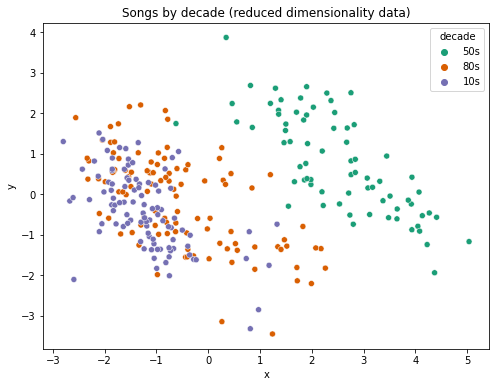

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))
plot = sns.scatterplot(x="x",y="y",hue=df_id["decade"],data=df_plot,palette="Dark2",ax=ax)
plot.set_title("Songs by decade (reduced dimensionality data)")

#### KMeans

In [7]:
def do_kmeans(x, standartize = True,**kwargs):  
    
    model = KMeans(**kwargs)
    pred = model.fit_predict(x)

    return pred, model

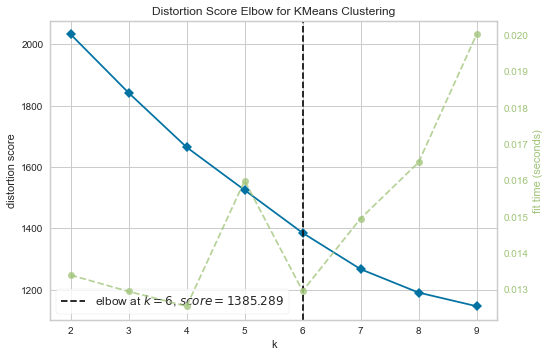

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,10))

visualizer.fit(x)        
visualizer.show()           

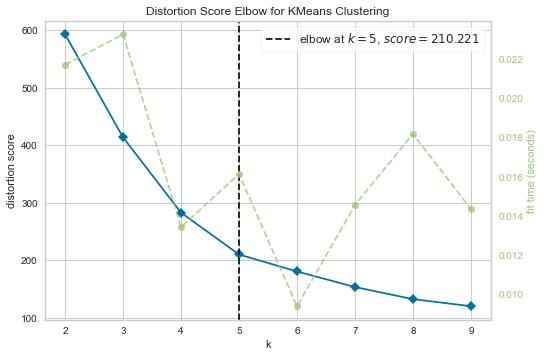

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(KMeans(), k=(2,10))

visualizer.fit(x_small)        
visualizer.show()      

Text(0, 0.5, 'Average silhouette width')

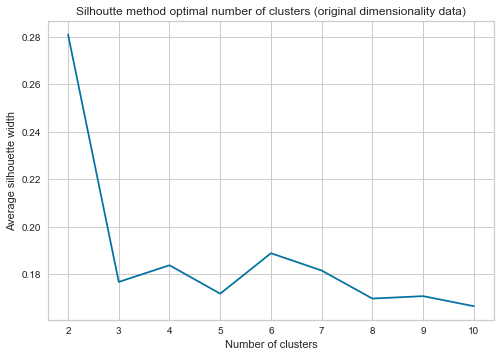

In [10]:
silhouette_scores = []
for i in list(range(2,11)):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(x)  
    silhouette_scores.append(visualizer.silhouette_score_)
    
plt.clf()
plt.plot(range(2,11),silhouette_scores)
plt.title("Silhoutte method optimal number of clusters (original dimensionality data)")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette width")

Text(0, 0.5, 'Average silhouette width')

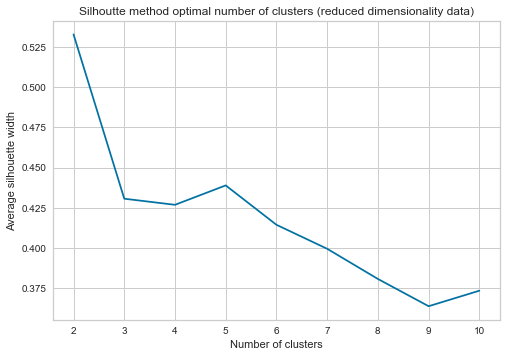

In [11]:
silhouette_scores = []
for i in list(range(2,11)):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(x_small)  
    silhouette_scores.append(visualizer.silhouette_score_)
    
plt.clf()
plt.plot(range(2,11),silhouette_scores)
plt.title("Silhoutte method optimal number of clusters (reduced dimensionality data)")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette width")

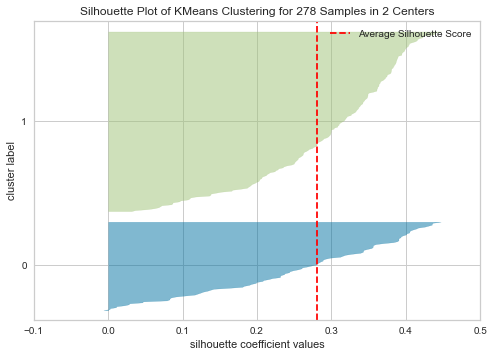

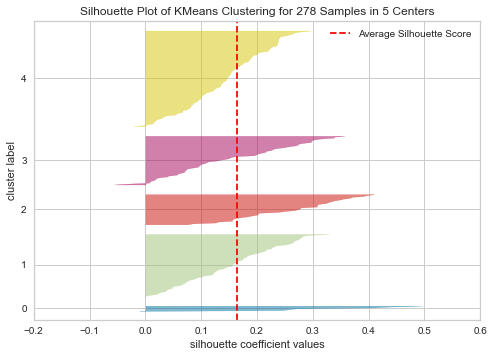

In [12]:
for i in [2,5]:
    model = KMeans(i,random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(x)        
    visualizer.show()       

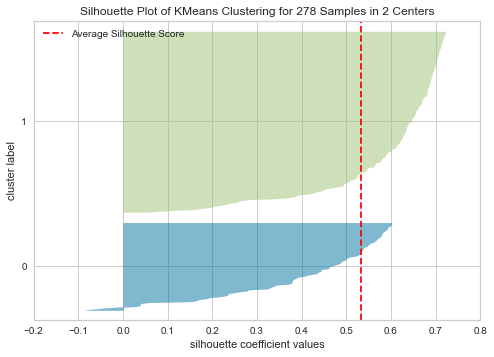

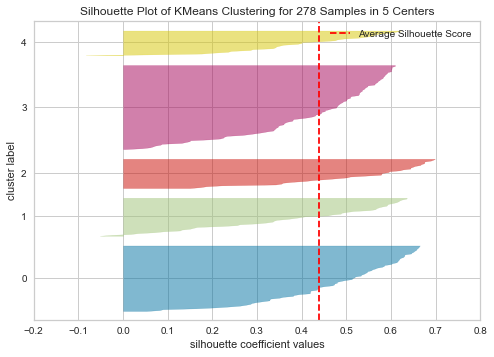

In [13]:
for i in [2,5]:
    model = KMeans(i,random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(x_small)        
    visualizer.show()       

Text(0.5, 1.0, 'K-means clustering (reduced dimensionality data)')

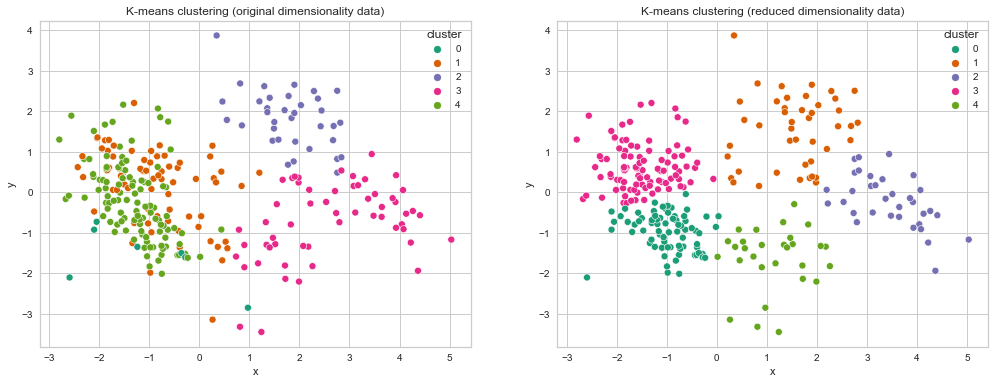

In [15]:
# elbow metodas
fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax = ax.flatten()
df_plot["cluster"], _ = do_kmeans(x,n_clusters=5,random_state=123)
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[0])
plot.set_title("K-means clustering (original dimensionality data)")

df_plot["cluster"], _ = do_kmeans(x_small,n_clusters=5,random_state=123)
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[1])
plot.set_title("K-means clustering (reduced dimensionality data)")

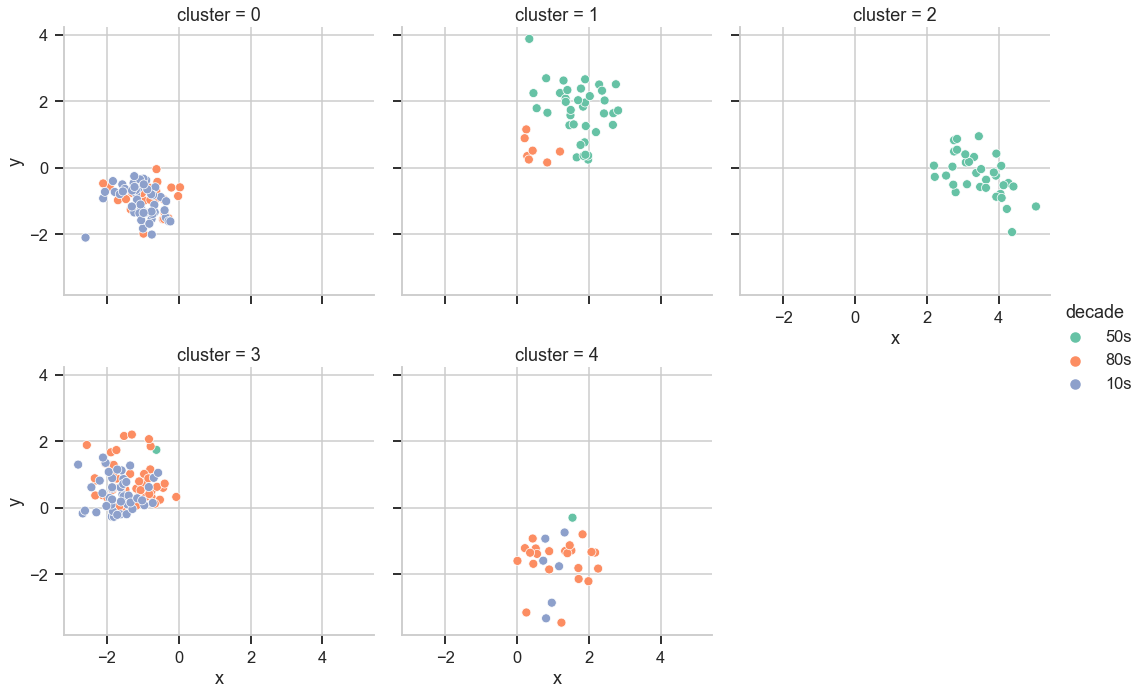

In [16]:
# kuo skiriasi klasteriai pagal desimtmecius
sns.set_context("talk")
df_plot["decade"] = df_id["decade"]
sns.relplot(x="x",y="y",kind="scatter",data=df_plot,col="cluster",hue="decade",palette="Set2",col_wrap=3)

Text(0.5, 1.0, 'K-means clustering (reduced dimensionality data)')

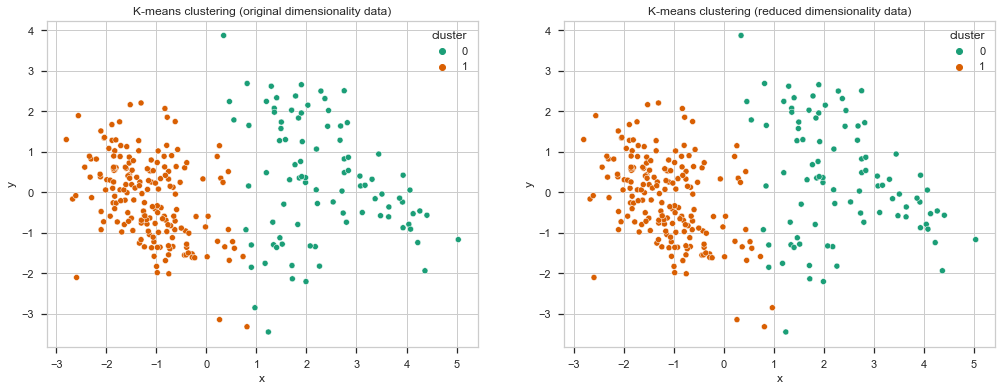

In [17]:
# silhouette metodas
sns.set_context("notebook")
fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax = ax.flatten()
df_plot["cluster"], _ = do_kmeans(x,n_clusters=2,random_state=123)
df["cluster_original"] = df_plot["cluster"]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[0])
plot.set_title("K-means clustering (original dimensionality data)")


df_plot["cluster"], _ = do_kmeans(x_small,n_clusters=2,random_state=123)
df["cluster_reduced"] = df_plot["cluster"]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[1])
plot.set_title("K-means clustering (reduced dimensionality data)")

In [19]:
def statistics(df):
    statistics_1 = df.groupby("cluster_original").describe().T
    statistics_1 = statistics_1.reset_index()[statistics_1.reset_index()["level_1"].isin(["mean"])]
    columns = list(statistics_1.columns)
    columns[0] = "variable"
    columns[1] = "statistic"
    for i in range(2,len(columns)):
        columns[i] = str(columns[i]) + "_original"
    statistics_1.columns = columns
    
    statistics_2 = df.groupby("cluster_reduced").describe().T
    statistics_2 = statistics_2.reset_index()[statistics_2.reset_index()["level_1"].isin(["mean"])]
    columns = list(statistics_2.columns)
    columns[0] = "variable"
    columns[1] = "statistic"
    for i in range(2,len(columns)):
        columns[i] = str(columns[i]) + "_reduced"
    statistics_2.columns = columns

    statistics =  statistics_1.merge(statistics_2,how="inner")
    
    statistics = statistics.reindex(sorted(statistics.columns), axis=1)
    
    return statistics

In [20]:
# klasteriu palyginimas
print(df["cluster_original"].value_counts())
print(df["cluster_reduced"].value_counts())

statistics(df)

1    186
0     92
Name: cluster_original, dtype: int64
1    187
0     91
Name: cluster_reduced, dtype: int64


0_original   0_reduced  1_original   1_reduced statistic      variable
0  113.195652  113.417582  120.677419  120.529412      mean         tempo
1   34.010870   34.076923   70.053763   69.828877      mean        energy
2   51.239130   51.263736   64.983871   64.898396      mean  danceability
3  -11.989130  -11.978022   -6.715054   -6.748663      mean      loudness
4   16.663043   16.736264   17.790323   17.748663      mean      liveness
5   51.956522   52.329670   57.456989   57.245989      mean       valence
6  170.923913  170.043956  232.779570  232.877005      mean      duration
7   70.597826   70.615385   15.516129   15.802139      mean  acousticness
8    4.304348    4.021978    6.548387    6.673797      mean   speechiness
9   46.934783   46.560440   71.887097   71.935829      mean    popularity

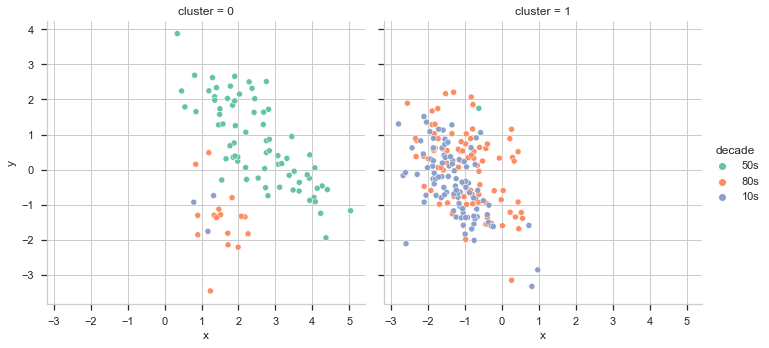

In [21]:
# kuo skiriasi klasteriai pagal desimtmecius
df_plot["decade"] = df_id["decade"]
sns.relplot(x="x",y="y",kind="scatter",data=df_plot,col="cluster",hue="decade",palette="Set2")

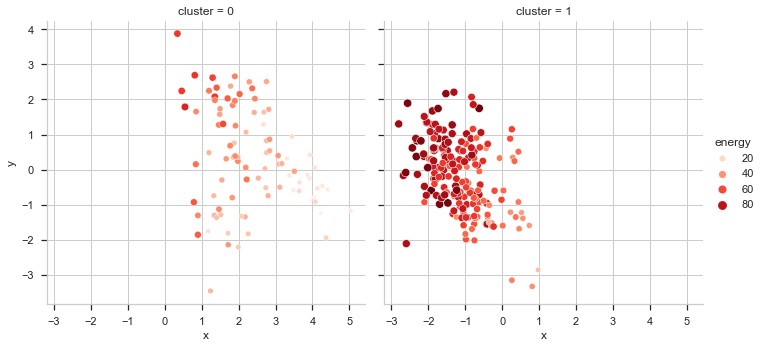

In [22]:
df_plot["energy"] = df["energy"]
sns.relplot(x="x",y="y",kind="scatter",hue="energy",size="energy",data=df_plot,col="cluster",palette="Reds")

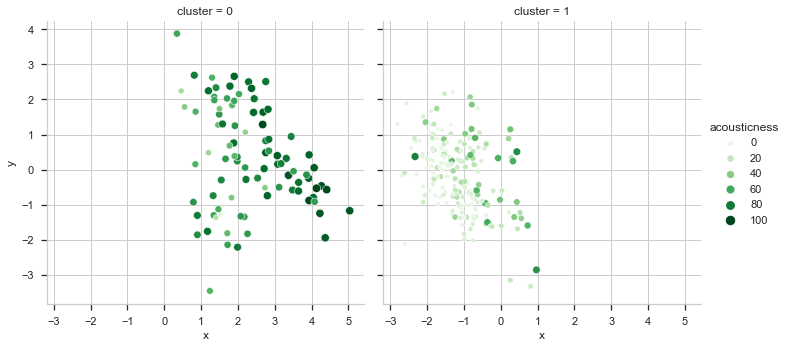

In [25]:
df_plot["acousticness"] = df["acousticness"]
sns.relplot(x="x",y="y",kind="scatter",hue="acousticness",size="acousticness",data=df_plot,col="cluster",palette="Greens",
            hue_norm = (-10,100))

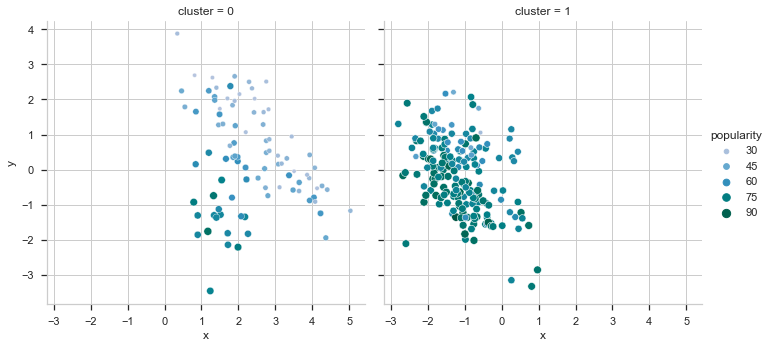

In [26]:
df_plot["popularity"] = df["popularity"]
sns.relplot(x="x",y="y",kind="scatter",hue="popularity",size="popularity",data=df_plot,col="cluster",palette="PuBuGn",
            hue_norm = (-10,100))

#### Hierarchical

In [130]:
def do_hierarchical(df, standartize = True,**kwargs):  
    model =  AgglomerativeClustering(**kwargs)
    pred = model.fit_predict(x)

    return pred, model

In [131]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    fig, ax = plt.subplots(1,1,figsize=(17, 6))
    dendrogram(linkage_matrix, **kwargs, ax = ax)


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram Ward linkage')

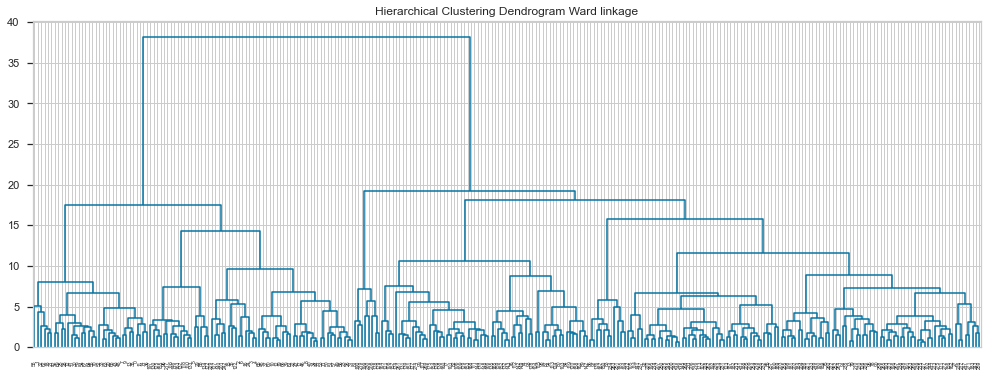

In [132]:
_, model = do_hierarchical(x,distance_threshold=0, n_clusters=None,linkage="ward")


plot_dendrogram(model, color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram Ward linkage")

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram Ward linkage')

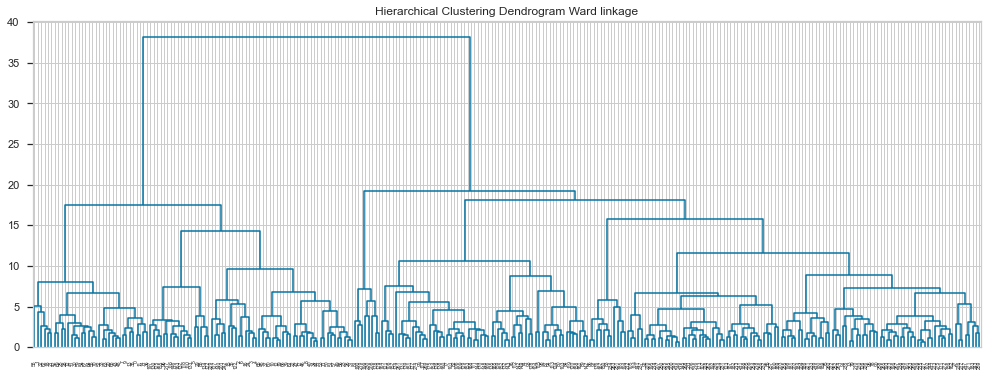

In [133]:
_, model = do_hierarchical(x_small,distance_threshold=0, n_clusters=None,linkage="ward")


plot_dendrogram(model, color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram Ward linkage")

Text(0.5, 1.0, 'Hierarchical clustering (reduced dimensionality data)')

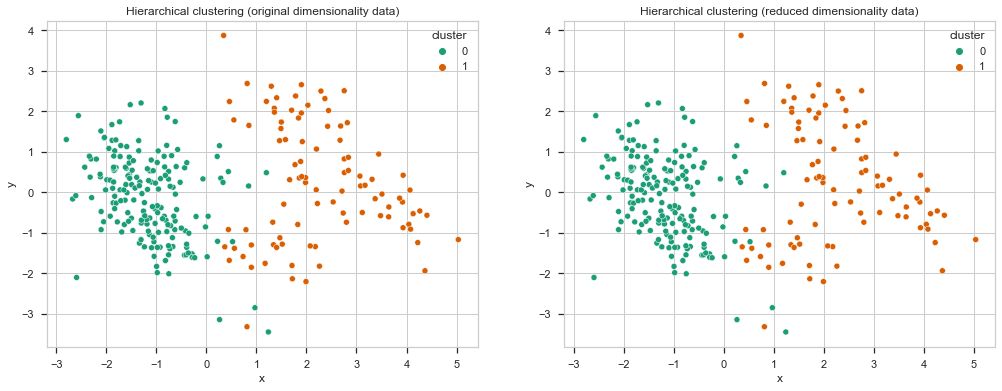

In [134]:
fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax = ax.flatten()
df_plot["cluster"], _ = do_hierarchical(x,n_clusters=2,linkage="ward")
df["cluster_original"] = df_plot["cluster"]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[0])
plot.set_title("Hierarchical clustering (original dimensionality data)")

df_plot["cluster"], _ = do_hierarchical(x_small,n_clusters=2,linkage="ward")
df["cluster_reduced"] = df_plot["cluster"]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[1])
plot.set_title("Hierarchical clustering (reduced dimensionality data)")

In [135]:
print(df["cluster_original"].value_counts())
print(df["cluster_reduced"].value_counts())

statistics(df)

0    184
1     94
Name: cluster_original, dtype: int64
0    184
1     94
Name: cluster_reduced, dtype: int64


0_original   0_reduced  1_original   1_reduced statistic      variable
0  120.119565  120.119565  114.446809  114.446809      mean         tempo
1   70.146739   70.146739   34.595745   34.595745      mean        energy
2   65.331522   65.331522   50.851064   50.851064      mean  danceability
3   -6.771739   -6.771739  -11.765957  -11.765957      mean      loudness
4   17.826087   17.826087   16.617021   16.617021      mean      liveness
5   58.250000   58.250000   50.521277   50.521277      mean       valence
6  232.815217  232.815217  172.170213  172.170213      mean      duration
7   15.684783   15.684783   69.095745   69.095745      mean  acousticness
8    6.760870    6.760870    3.936170    3.936170      mean   speechiness
9   71.820652   71.820652   47.595745   47.595745      mean    popularity

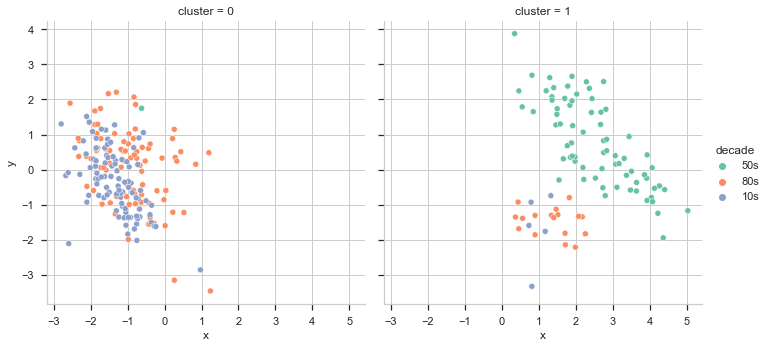

In [136]:
df_plot["decade"] = df_id["decade"]
sns.relplot(x="x",y="y",kind="scatter",data=df_plot,col="cluster",hue="decade",palette="Set2")

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram Complete linkage')

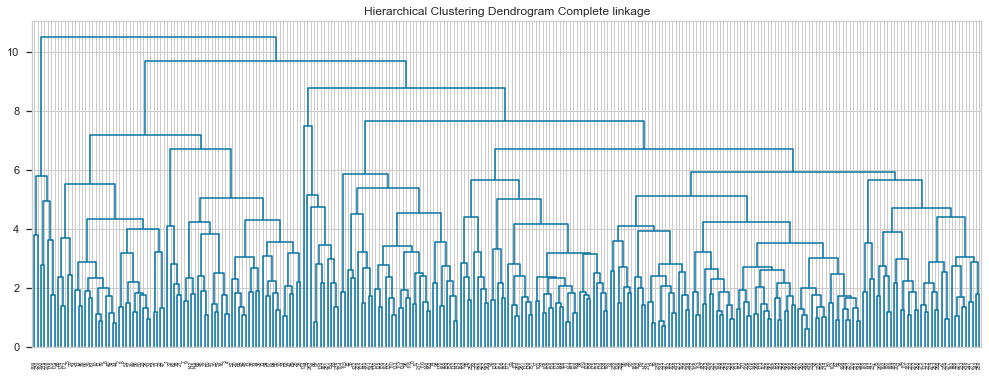

In [137]:
# kitas jungimo metodas
_, model = do_hierarchical(x,distance_threshold=0, n_clusters=None,linkage="complete")


plot_dendrogram(model,color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram Complete linkage")

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram Complete linkage')

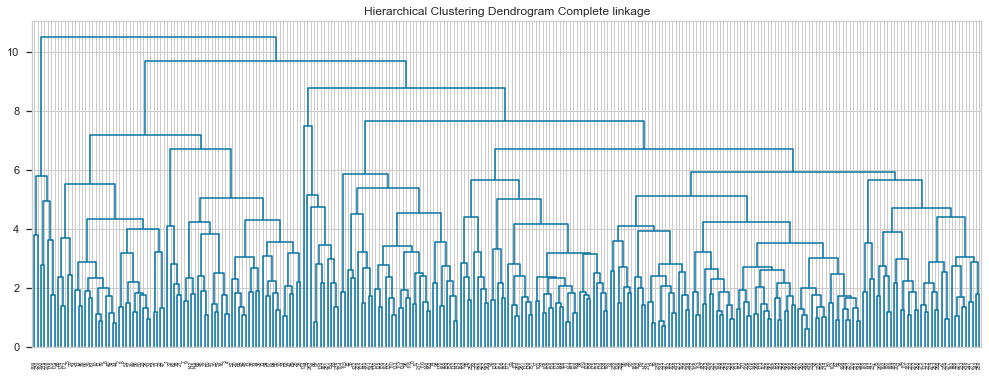

In [138]:
_, model = do_hierarchical(x_small,distance_threshold=0, n_clusters=None,linkage="complete")


plot_dendrogram(model,color_threshold=0)
plt.title("Hierarchical Clustering Dendrogram Complete linkage")

Text(0.5, 1.0, 'Hierarchical clustering (reduced dimensionality data)')

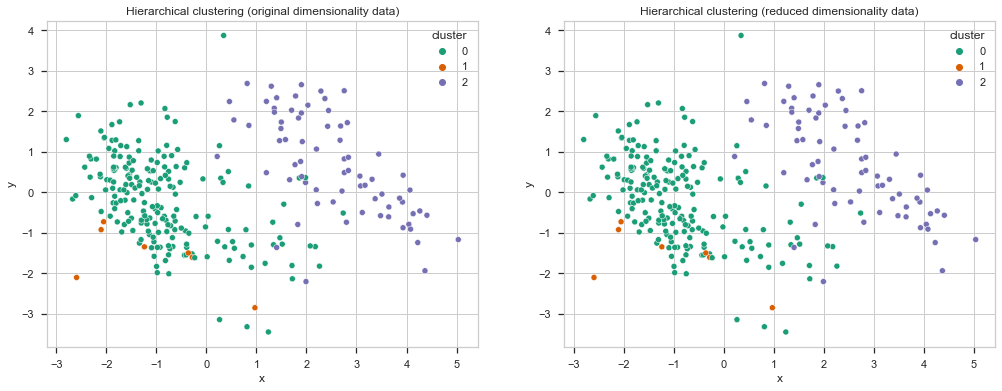

In [139]:
# kazkokie prastesni rezultatai
fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax = ax.flatten()
df_plot["cluster"], _ = do_hierarchical(x,n_clusters=3,linkage="complete")
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[0])
plot.set_title("Hierarchical clustering (original dimensionality data)")

df_plot["cluster"], _ = do_hierarchical(x_small,n_clusters=3,linkage="complete")
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot,palette="Dark2",ax=ax[1])
plot.set_title("Hierarchical clustering (reduced dimensionality data)")

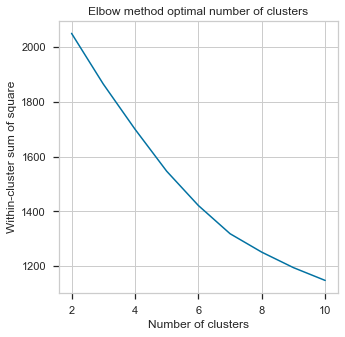

In [121]:
# jeigu kazkur prireiktu
distortion = []
for k in range(2, 11):
    variance = []
    model =  AgglomerativeClustering(n_clusters=k,linkage="ward")
    clusters = model.fit_predict(x)
    x_df = pd.DataFrame(x)
    for i in np.unique(clusters):
        variance.append(np.linalg.norm((x_df[clusters == i] - x_df[clusters == i].mean()))**2)
    distortion.append(np.sum(variance))

fig, ax = plt.subplots(1,1,figsize=(5, 5))   
plt.plot(range(2,11),distortion)
plt.title("Elbow method optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of square")
plt.show()

#### DBSCAN

In [76]:
from sklearn.neighbors import NearestNeighbors
def do_dbscan(df, **kwargs): 
    model = DBSCAN(**kwargs)
    pred = model.fit_predict(x)

    return pred, model

In [99]:
x.shape, x_small.shape

((278, 10), (278, 2))

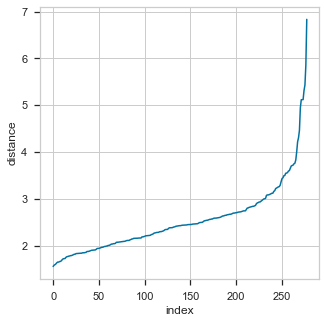

In [120]:
nn=NearestNeighbors(n_neighbors=20).fit(x)

distances, indices = nn.kneighbors(x)
farthest = distances[:,-1]

fig, ax = plt.subplots(1,1,figsize=(5, 5))
plt.plot(np.sort(farthest))
plt.xlabel("index")
plt.ylabel("distance")
plt.show()

#####  Originaliam duomenų rinkiniui: minSamples = 2n = 20 , eps = 3.5

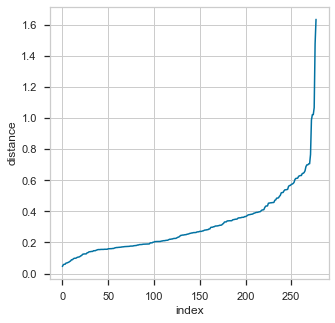

In [119]:
nn=NearestNeighbors(n_neighbors=min_samples_small).fit(x_small)

distances, indices = nn.kneighbors(x_small)
farthest = distances[:,-1]

fig, ax = plt.subplots(1,1,figsize=(5, 5))
plt.plot(np.sort(farthest))
plt.xlabel("index")
plt.ylabel("distance")
plt.show()

#####  Sumažintos dimensijos duomenų rinkiniui: minSamples = 4, eps = 0.7

Text(0.5, 1.0, 'DBSCAN clustering (reduced dimensionality data)')

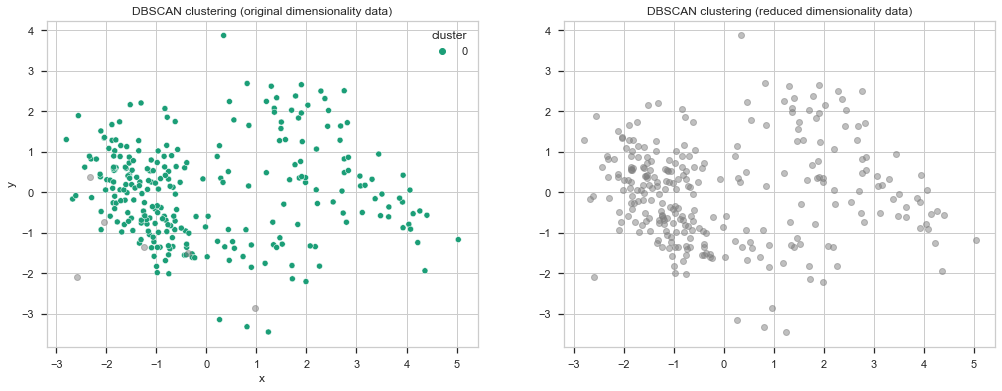

In [80]:
fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax = ax.flatten()
df_plot["cluster"], _ = do_dbscan(x,min_samples=20,eps=3.5)
df_noise = df_plot[df_plot["cluster"]==-1]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot[df_plot["cluster"]!=-1],palette="Dark2",ax=ax[0])
plot.scatter(df_noise["x"],df_noise["y"],c="grey",alpha=0.5)
plot.set_title("DBSCAN clustering (original dimensionality data)")


df_plot["cluster"], _ = do_dbscan(x_small,min_samples=4,eps=0.7)
df_noise = df_plot[df_plot["cluster"]==-1]
plot = sns.scatterplot(x="x",y="y",hue="cluster",data=df_plot[df_plot["cluster"]!=-1],palette="Dark2",ax=ax[1])
plot.scatter(df_noise["x"],df_noise["y"],c="grey",alpha=0.5)
plot.set_title("DBSCAN clustering (reduced dimensionality data)")